## Structural analysis of chimeras

We have seen how to find fragments from the Fuzzle database and build chimeras with them. We have also evaluated their potential energy with several energy scoring functions. Now we are going to have a look at the structures of these chimeras in depth.

First import the protlego module.

In [1]:
import sys
sys.path.append('/agh/projects/noelia/chimAuto/') # Path where ProtLego folder is located
from protlego import *

Fetch for example by the HitID from the Fuzzle-database, as explained in detail in the "Fetching from the Fuzzle database" section. We can have a look at the chimeras that we built in tutorial 3.

In [4]:
myhit= fetch_id('hh207clusters','6242020')

Let's build all possible chimera-combinations from query and subject, as explained in detail in the "Building chimeras" section. The chimeras will be stored as a dictionary in the variable chimeras:

In [5]:
a=Builder(myhit)
aln=a.get_alignment(myhit.query,myhit.no)
qpairs, spairs = a.get_pairs(aln)
qPDB, sPDB = a.superimpose_structures(partial_alignment=True)
chimeras=a.build_chimeras(partial_alignment=True)

2020-01-21 12:26:22,079 - moleculekit.molecule - WARNING - Alternative atom locations detected. Only altloc A was kept. If you prefer to keep all use the keepaltloc="all" option when reading the file.
2020-01-21 12:26:23,329 - protlego - INFO - Found the following non-standar residue: MSE
2020-01-21 12:26:23,382 - protlego - INFO - Found the following non-standar residue: MSE
2020-01-21 12:26:23,471 - protlego - INFO - Performing alignment 1 with TMalign
2020-01-21 12:26:26,566 - protlego - INFO - The RMSD between the fragments is 2.92824649810791 over 9 alpha carbons
2020-01-21 12:26:26,583 - protlego - INFO - Performing alignment 2 with TMalign
2020-01-21 12:26:26,659 - protlego - INFO - The RMSD between the fragments is 1.9147093296051025 over 16 alpha carbons
2020-01-21 12:26:26,675 - protlego - INFO - Performing alignment 3 with TMalign
2020-01-21 12:26:26,752 - protlego - INFO - The RMSD between the fragments is 1.1340450048446655 over 11 alpha carbons
2020-01-21 12:26:26,772 - p

### 1. Hydrophobic cluster analysis

The side chains of isoleucine, leucine, and valine (ILV) residues often form large hydrophobic clusters that very effectively impede the penetration of water to their underlying hydrogen bond networks and, thereby, enables these ILV clusters to serve as cores of stability in high‐energy partially folded states. For more information, see this publication: https://onlinelibrary.wiley.com/doi/full/10.1002/pro.2860
To compute hydrophobic clusters for a chimera object, we use the compute_hydrophobic_clusters() function. The ouput will be for each computed cluster:

The cluster index,
the residues involved in the cluster formation,
the total area,
the number of contacts,
the contacts per residues, and
the area per residue.

The output can be stored in a variable to print it out for example write it into a file.

In [ ]:
clusters= chimeras['comb1_103'].compute_hydrophobic_clusters()

In [ ]:
print(clusters[0])

In [ ]:
print(clusters[0].area)
print(clusters[0].residues)
print(clusters[0].contacts)
print(clusters[0].ratio_contacts_residue)
print(clusters[0].ratio_area_residue)

With the view function one can visualize the clusters using vmd. They are displayed with VDW-spheres in different colors.

In [ ]:
chimeras['comb1_103'].view()

There is also the possibility to change the selection for computing the clusters.The default selection are the hydrophobic residues Valine, Leucine and Isoleucine. For example, we can add PHE to the selection.

In [ ]:
chimeras['comb1_103'].compute_hydrophobic_clusters(sel='protein and noh and not backbone and resname PHE LEU VAL ILE')
chimeras['comb1_103'].view()

Instead of a chimera object one can also work with a pdb initialized as a chimera object. Let's use the pdb from HisF, the pdb we used for the first VMD practical

In [ ]:
protein=Chimera(filename='/agh/projects/noelia/abhishek/chimera/2lle.pdb')
protein.compute_hydrophobic_clusters()
protein.view()

### 2. Salt bridges analysis


A salt bridge is a combination of two non-covalent interactions: hydrogen bonding and ionic bonding. Ion pairing is one of the most important noncovalent forces in biological systems and it contributes to the stability to the entropically unfavorable folded conformation of proteins.

To compute the salt bridges for a chimera object use the compute_salt_bridges() function.

Use the view() function to visualize the salt bridges they will be displayed in Licorice. The positively charged residues are displayed in blue and the negatively charged residue are displayed in red. As before, one can also work with a pdb initialized as a chimera object.

In [ ]:
protein=Chimera(filename='/agh/projects/noelia/abhishek/chimera/2lle.pdb')
protein.compute_salt_bridges()
protein.view()

### 3. Hydrogen Network analysis

A hydrogen bond (H-bond) is a primarily electrostatic force of attraction between a hydrogen (H) atom which is covalently bound to a more electronegative atom (called the donor) and another electronegative atom bearing a lone pair of electrons—the hydrogen bond acceptor (called the acceptor)

To compute the hydrogen networks for a chimera object use the compute_hydrogen_networks() function. With the sidechain_only argument it is possible to compute hydrogen networks not only between the sidechains, which is the default.

Use the view() function to visualize the hydrogen bonds they are displayed in licorice. They are represented in different colors when they belong to the same hydrogen bond network. Again one can also work with a pdb initialized as a chimera object.

In [2]:
protein=Chimera(filename='/agh/projects/noelia/abhishek/chimera/2lle.pdb')
protein.compute_hydrogen_networks()
protein.view()

2020-01-21 12:25:16,046 - propka - INFO - No pdbfile provided
/agh/projects/noelia/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


### 4. Further structural analysis

#### 4.1 Calculate solvent accessible surface area

The solvent-accessible surface area (SASA) is the surface area of a biomolecule that is accessible to a solvent. The function calc_sasa() calculates for a chimera object the solvent accessible surface area. By default, the function computes the total SASA, but it is also possible to calculate the polar or apolar surface area with the parameter sasa_type="polar", sasa_type="apolar".


In [6]:
total=calc_sasa(chimera=chimeras['comb1_103'])
polar=calc_sasa(chimera=chimeras['comb1_103'] ,sasa_type="polar")
apolar=calc_sasa(chimera=chimeras['comb1_103'] ,sasa_type="apolar")
totalpdbfile=calc_sasa(filename='/agh/projects/noelia/abhishek/chimera/2lle.pdb')


2020-01-21 12:28:29,533 - protlego - INFO - Area is 120.56597900390625 (nm)^2
2020-01-21 12:28:29,788 - protlego - INFO - Area is 94.2850341796875 (nm)^2
2020-01-21 12:28:30,033 - protlego - INFO - Area is 24.696435928344727 (nm)^2
/agh/projects/noelia/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
2020-01-21 12:28:32,717 - protlego - INFO - Area is 126.6241455078125 (nm)^2


#### 4.2 Secondary structure for every residue

To calculate the secondary structure for every residue in a pdb or a chimera object we can use the function calc_dssp(). The output will be an array containg a one letter code for the secondary structure for each residue. 

- C:  Coil
- H:  Helix
- E:  Sheet

In [7]:
calc_dssp(chimera=chimeras['comb1_103'])

array([['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'E', 'E',
        'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
        'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C',
        'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H',
        'H', 'H', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'E', 'E',
        'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'C',
        'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E',
        'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'E', 'E',
        'E', 'E', 'E', 'E', 'E', 'E', 'E', 'H', 'H', 'H', 'H', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'

If the parameter simplified is set to false. The code expandes:

- H: 	Alpha helix
- B:	Isolated beta-bridge residue
- E: 	Strand
- G: 	3-10 helix
- I: 	Pi helix
- T: 	Turn
- S: 	Bend
- ' ':      None

In [8]:
calc_dssp(chimera=chimeras['comb1_103'], simplified=False)

array([[' ', ' ', ' ', ' ', 'S', ' ', 'T', 'T', ' ', ' ', ' ', 'E', 'E',
        'E', 'E', 'E', ' ', ' ', ' ', ' ', 'T', 'T', ' ', 'H', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
        'S', ' ', ' ', ' ', 'E', 'E', 'E', 'E', ' ', 'T', 'T', 'T', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'H', 'I', 'I', 'I', 'I',
        'I', 'I', ' ', ' ', ' ', 'S', 'S', 'T', 'T', 'T', 'S', 'T', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', ' ', 'S', 'E', 'E',
        'E', 'E', 'E', 'E', 'E', 'E', ' ', 'S', 'S', 'S', ' ', ' ', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'G', 'G', 'G', 'T',
        'T', 'T', 'T', 'T', 'T', 'T', 'T', ' ', 'E', 'E', 'E', 'E', 'E',
        'E', 'E', 'E', 'S', 'S', ' ', ' ', 'S', ' ', ' ', 'H', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', ' ', 'E', 'E',
        'E', 'E', 'E', 'E', 'E', 'E', 'E', 'G', 'G', 'G', 'G', 'G', 'G',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'

#### 4.3 Calculating distance matrices 

The function calc_dist_matrix calculates a distance matrix for a chimera object or a pdb file. The selection can be defined, default selection is by residue but selection can be also alpha for taking only the C alpha atoms into account. Also the type can be defined default is contacts for calculating only a contact map, but the parameter type can be also set to distances to draw a distance matrix. The parameter plot can be set to true to draw a plot.

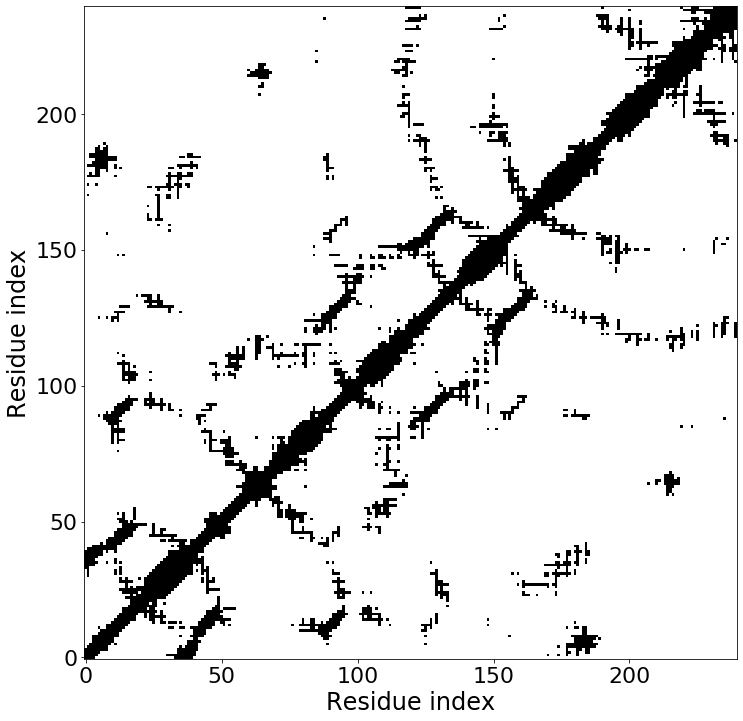

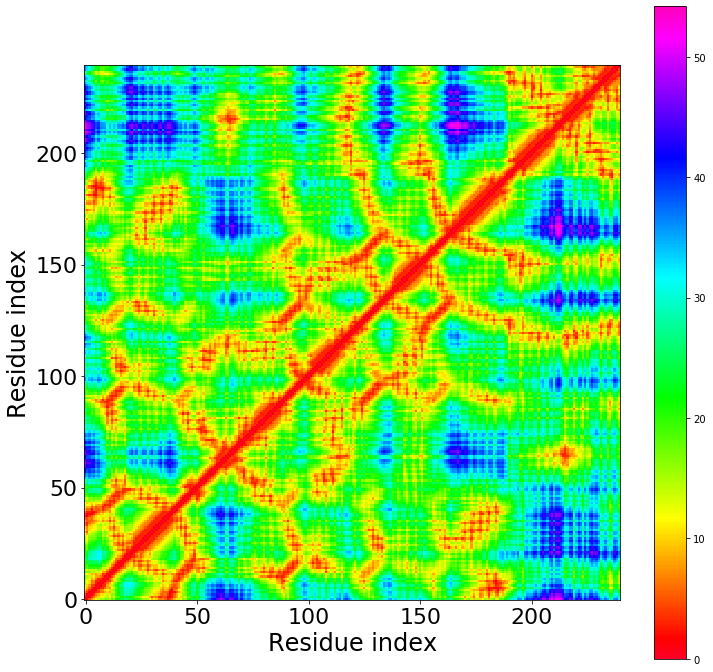

In [9]:
contact_map=calc_dist_matrix(chimera=chimeras['comb1_103'], plot=True)
distance_matrix=calc_dist_matrix(chimera=chimeras['comb1_103'],type='distances', plot=True)

#### 4.4 Calculating contact orders

The function calc_contact_order can be used to calculate the contact order of a protein. It is a measure of the locality of the inter-amino acid contacts in the native folded state. It is computed as the average sequence distance between residues that form contacts below a threshold in the folded protein divided by the total length of the protein. The function can calculate the contact order of a chimera object or a pdb file  and the distance cutoff can be set, the default distance cutoff is 8 Ångström. The output is the contact order.

In [11]:
calc_contact_order(chimera=chimeras['comb1_103'])

Contact order is 14.391958203440714 %


14.391958203440714